In [66]:
# For loading Packages
import pandas as pd

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# For mathematical calculations
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# To build and evaluate model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import tensorflow as tf
# To ignore any warnings
import warnings
warnings.filterwarnings("ignore")


In [67]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train2= df_train.copy().drop(['Transported'],axis=1)


In [68]:
data = pd.read_csv('updated.csv')
data = data.drop(['Unnamed: 0'], axis=1)
print(data.shape)
data.head()

(12970, 24)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinDeck,CabinNo.,CabinSide,Group,Group_size,Last_name,Family_size,IsAlone,Luxury_exp,Regular_exp,Total_exp
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,B,0,P,1,1,Ofracculy,3.0,True,0.0,0.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,F,0,S,2,1,Vines,4.0,True,702.0,34.0,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,A,0,S,3,2,Susent,7.0,False,6807.0,3576.0,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,A,0,S,3,2,Susent,7.0,False,3522.0,1654.0,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,F,1,S,4,1,Santantines,9.0,True,870.0,221.0,1091.0


In [69]:
data.isnull().sum().sort_values(ascending=False)

PassengerId     0
HomePlanet      0
Regular_exp     0
Luxury_exp      0
IsAlone         0
Family_size     0
Last_name       0
Group_size      0
Group           0
CabinSide       0
CabinNo.        0
CabinDeck       0
Name            0
VRDeck          0
Spa             0
ShoppingMall    0
FoodCourt       0
RoomService     0
VIP             0
Age             0
Destination     0
Cabin           0
CryoSleep       0
Total_exp       0
dtype: int64

In [70]:
full_tran = pd.merge(data, df_train[['PassengerId','Transported']], on='PassengerId', how='left')
print(full_tran.shape)
full_tran.head(2)

(12970, 25)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinDeck,CabinNo.,CabinSide,Group,Group_size,Last_name,Family_size,IsAlone,Luxury_exp,Regular_exp,Total_exp,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,B,0,P,1,1,Ofracculy,3.0,True,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,F,0,S,2,1,Vines,4.0,True,702.0,34.0,736.0,True


In [71]:
full_tran.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'CabinDeck', 'CabinNo.', 'CabinSide', 'Group', 'Group_size',
       'Last_name', 'Family_size', 'IsAlone', 'Luxury_exp', 'Regular_exp',
       'Total_exp', 'Transported'],
      dtype='object')

In [74]:
isalonedf = train_full.groupby('CabinDeck').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'count'
                                                          }).reset_index()
isalonedf['TransportedPercentage'] = isalonedf['Transported'] / isalonedf['PassengerId']
isalonedf

,CabinDeck,Transported,PassengerId,TransportedPercentage
0,A,127,256,0.496094
1,B,572,779,0.734275
2,C,508,747,0.680054
3,D,207,478,0.433054
4,E,313,876,0.357306
5,F,1329,2993,0.444036
6,G,1321,2559,0.516217
7,T,1,5,0.2


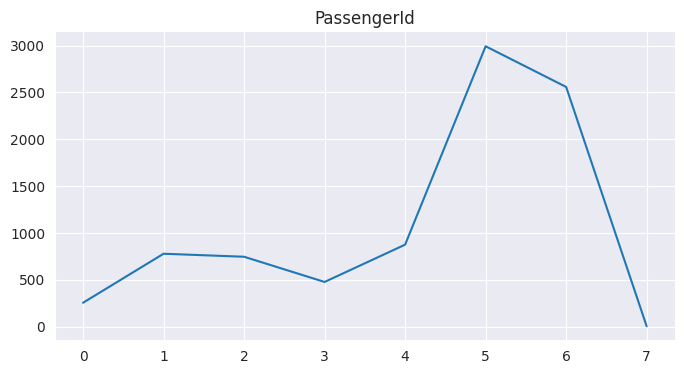

In [75]:
from matplotlib import pyplot as plt
isalonedf['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

In [94]:
# Select features to feed the model
full_tran = full_tran[[ 'HomePlanet', 'CryoSleep',  'Destination', 'Age',
       'VIP', 'RoomService', 'FooCdourt', 'ShoppingMall', 'Spa', 'VRDeck',
        'CabinDeck',  'CabinSide',  'Group_size',
        'Family_size', 'IsAlone', 'Luxury_exp', 'Regular_exp',
       'Total_exp', 'Transported']]
full_tran.shape

(12970, 19)

In [95]:
train_full = full_tran.loc[full_tran['Transported'].notnull()]
test_full = full_tran.loc[full_tran['Transported'].isnull()]

In [96]:
print(train_full.shape)
print(test_full.shape)

(8693, 19)
(4277, 19)


In [97]:
train_full.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,Group_size,Family_size,IsAlone,Luxury_exp,Regular_exp,Total_exp,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,P,1,3.0,True,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,S,1,4.0,True,702.0,34.0,736.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,S,2,7.0,False,6807.0,3576.0,10383.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,S,2,7.0,False,3522.0,1654.0,5176.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,S,1,9.0,True,870.0,221.0,1091.0,True


In [98]:
X = train_full.drop(columns='Transported')

In [99]:
numerical_columns = X.select_dtypes(include=['int','float64']).columns
categorical_columns = X.select_dtypes(include=['object','boolean']).columns
print(numerical_columns)
print(categorical_columns)

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Group_size', 'Family_size', 'Luxury_exp', 'Regular_exp', 'Total_exp'],
      dtype='object')
Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck',
       'CabinSide', 'IsAlone'],
      dtype='object')


In [100]:
X_encoded = pd.get_dummies(X, columns=categorical_columns)
X_encoded


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_size,Family_size,Luxury_exp,Regular_exp,Total_exp,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S,IsAlone_False,IsAlone_True
0,39.0,0.0,0.0,0.0,0.0,0.0,1,3.0,0.0,0.0,0.0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1
1,24.0,109.0,9.0,25.0,549.0,44.0,1,4.0,702.0,34.0,736.0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,2,7.0,6807.0,3576.0,10383.0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,2,7.0,3522.0,1654.0,5176.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,9.0,870.0,221.0,1091.0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,1,3.0,1717.0,6819.0,8536.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
8689,18.0,0.0,0.0,0.0,0.0,0.0,1,5.0,0.0,0.0,0.0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,8.0,1.0,1872.0,1873.0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,2,7.0,3588.0,1049.0,4637.0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0


In [101]:
y = train_full['Transported']
y = y.astype(int)

In [102]:
baseline_model = RandomForestClassifier(random_state = 1)
baseline_model.fit(X_encoded, y)

RandomForestClassifier(random_state=1)

In [103]:
# store accuracy of baseline model prediction in results
result = cross_val_score(baseline_model, X_encoded, y, cv = 50, scoring = "accuracy")

# print mean and standard deviation of baseline model
print(np.mean(result))
print(np.std(result))

0.7886818151617832
0.033447670587437986


In [54]:
# provide range for max_depth from 1 to 40 with an interval of 2
# provide range for n_estimators from 1 to 400 with an interval of 20
paramgrid = {'max_depth': list(range(1, 15, 1)),
             'n_estimators': list(range(1, 500, 50))}
grid_search = GridSearchCV(RandomForestClassifier(random_state = 1), paramgrid)

# fit the grid search model
grid_search.fit(X_encoded, y)

# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=451, random_state=1)

In [104]:
baseline_model = RandomForestClassifier(max_depth=8, n_estimators=450, random_state = 1)
baseline_model.fit(X_encoded, y)

RandomForestClassifier(max_depth=8, n_estimators=450, random_state=1)

In [105]:
# store accuracy of baseline model prediction in results
result = cross_val_score(baseline_model, X_encoded, y, cv = 50, scoring = "accuracy")

# print mean and standard deviation of baseline model
print(np.mean(result))
print(np.std(result))

0.8014517307820078
0.0336753151803669


In [106]:
X_pred = test_full.drop(columns="Transported")
X_pred

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,Group_size,Family_size,IsAlone,Luxury_exp,Regular_exp,Total_exp
8693,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,G,S,1,8.0,True,0.0,0.0,0.0
8694,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,F,S,1,4.0,True,2823.0,9.0,2832.0
8695,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,C,S,1,6.0,True,0.0,0.0,0.0
8696,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,C,S,1,2.0,True,766.0,6652.0,7418.0
8697,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,F,S,1,5.0,True,10.0,635.0,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,G,S,2,10.0,False,0.0,0.0,0.0
12966,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,F,S,1,6.0,True,154.0,864.0,1018.0
12967,Mars,True,55 Cancri e,28.771969,False,0.0,0.0,0.0,0.0,0.0,D,P,1,4.0,True,0.0,0.0,0.0
12968,Europa,False,TRAPPIST-1e,28.771969,False,0.0,2680.0,0.0,0.0,523.0,D,P,1,7.0,True,523.0,2680.0,3203.0


In [107]:
X_pred_encoded = pd.get_dummies(X_pred, columns=categorical_columns)
X_pred_encoded

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_size,Family_size,Luxury_exp,Regular_exp,Total_exp,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S,IsAlone_False,IsAlone_True
8693,27.000000,0.0,0.0,0.0,0.0,0.0,1,8.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1
8694,19.000000,0.0,9.0,0.0,2823.0,0.0,1,4.0,2823.0,9.0,2832.0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1
8695,31.000000,0.0,0.0,0.0,0.0,0.0,1,6.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1
8696,38.000000,0.0,6652.0,0.0,181.0,585.0,1,2.0,766.0,6652.0,7418.0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1
8697,20.000000,10.0,0.0,635.0,0.0,0.0,1,5.0,10.0,635.0,645.0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,34.000000,0.0,0.0,0.0,0.0,0.0,2,10.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0
12966,42.000000,0.0,847.0,17.0,10.0,144.0,1,6.0,154.0,864.0,1018.0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1
12967,28.771969,0.0,0.0,0.0,0.0,0.0,1,4.0,0.0,0.0,0.0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
12968,28.771969,0.0,2680.0,0.0,0.0,523.0,1,7.0,523.0,2680.0,3203.0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1


In [108]:
tree_preds = baseline_model.predict(X_pred_encoded)
tree_preds = pd.DataFrame(tree_preds.astype(bool))
tree_preds


,0
0,True
1,False
2,True
3,True
4,True
...,...
4272,True
4273,True
4274,True
4275,True


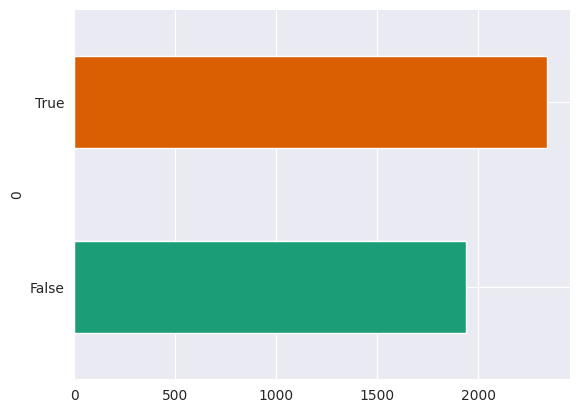

In [109]:

tree_preds.groupby(0).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
df_sub = df_test.merge(tree_preds, left_index=True, right_index=True)
df_sub = df_sub.rename(columns={0:'Transported'})
df_submit = df_sub[['PassengerId','Transported']]
df_submit.set_index('PassengerId', inplace=True)
df_submit.to_csv('/content/drive/MyDrive/Data Analytics Boot Camp/Project_4/results/predictions_tree_4.csv')

In [ ]:
df_submit.head(50)

# Neural Network

In [ ]:
X = train_full.drop(columns='Transported')
y = train_full['Transported']
y = y.astype(int)

In [ ]:
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,IsAlone,Total_exp
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,P,True,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,S,True,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,S,False,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,S,False,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,S,True,1091.0


In [ ]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [ ]:
numerical_columns = X.select_dtypes(include=['int','float64']).columns
categorical_columns = X.select_dtypes(include=['object','boolean']).columns

print(numerical_columns)
print(categorical_columns)

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Total_exp'],
      dtype='object')
Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck',
       'CabinSide', 'IsAlone'],
      dtype='object')


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('numeric', StandardScaler(), numerical_columns)
        ])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_test  = preprocessor.transform(X_test)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.704388,-0.332581,-0.283561,-0.277006,-0.279983,-0.261588,-0.510400
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.983617,-0.007625,0.267259,-0.277006,-0.279983,-0.261588,-0.197177
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.342720,-0.304661,0.135757,-0.277006,-0.256606,-0.261588,-0.256083
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.901178,-0.332581,-0.283561,-0.178323,-0.279983,1.437905,0.203170
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.552142,0.206713,-0.109259,-0.277006,-0.279983,-0.135186,-0.230334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.634581,0.969366,-0.283561,0.739427,-0.279983,-0.261588,0.020104
6950,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.704388,-0.332581,-0.121665,0.007386,1.366269,1.294189,0.861360
6951,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.342720,-0.007625,-0.263712,-0.263848,-0.279983,-0.261588,-0.496291
6952,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.262845,-0.332581,-0.283561,-0.277006,-0.279983,-0.261588,-0.510400


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=100, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(units=80, activation='relu'),
    tf.keras.layers.Dense(units=80, activation='relu'),
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3000      
                                                                 
 dense_1 (Dense)             (None, 80)                8080      
                                                                 
 dense_2 (Dense)             (None, 80)                6480      
                                                                 
 dense_3 (Dense)             (None, 1)                 81        
                                                                 
Total params: 17641 (68.91 KB)
Trainable params: 17641 (68.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=100, verbose=True)

Epoch 1/100
218/218 [==============================] - 2s 2ms/step - loss: 0.4621 - accuracy: 0.7773
Epoch 2/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.7939
Epoch 3/100
218/218 [==============================] - 1s 3ms/step - loss: 0.4042 - accuracy: 0.8024
Epoch 4/100
218/218 [==============================] - 1s 2ms/step - loss: 0.4001 - accuracy: 0.8056
Epoch 5/100
218/218 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8090
Epoch 6/100
218/218 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8102
Epoch 7/100
218/218 [==============================] - 1s 3ms/step - loss: 0.3871 - accuracy: 0.8116
Epoch 8/100
218/218 [==============================] - 1s 3ms/step - loss: 0.3832 - accuracy: 0.8152
Epoch 9/100
218/218 [==============================] - 1s 3ms/step - loss: 0.3816 - accuracy: 0.8131
Epoch 10/100
218/218 [==============================] - 1s 4ms/step - loss: 0.3817 - accura

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

55/55 [==============================] - 0s 2ms/step - loss: 1.1140 - accuracy: 0.7579
Test accuracy: 0.7579068541526794, Test loss: 1.1140379905700684


In [ ]:
X = preprocessor.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.709517,-0.337459,-0.284587,-0.287074,-0.274288,-0.266353,-0.514066
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.336637,-0.172314,-0.278944,-0.245246,0.213732,-0.227538,-0.251479
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.034646,-0.272310,1.957530,-0.287074,5.694840,-0.223127,3.190333
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.291056,-0.337459,0.519841,0.333649,2.684942,-0.096096,1.332604
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.894586,0.121615,-0.240698,-0.034435,0.227955,-0.264589,-0.124824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.849004,-0.337459,3.990860,-0.287074,1.186215,-0.201073,2.531369
8689,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.755099,-0.337459,-0.284587,-0.287074,-0.274288,-0.266353,-0.514066
8690,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.197150,-0.337459,-0.284587,2.844984,-0.273399,-0.266353,0.154175
8691,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.221312,-0.337459,0.373126,-0.287074,0.039503,2.587434,1.140302


In [ ]:
model.fit(X,y,epochs=100, verbose=True )

Epoch 1/100
272/272 [==============================] - 1s 2ms/step - loss: 0.3980 - accuracy: 0.8453
Epoch 2/100
272/272 [==============================] - 1s 2ms/step - loss: 0.3163 - accuracy: 0.8606
Epoch 3/100
272/272 [==============================] - 1s 2ms/step - loss: 0.2940 - accuracy: 0.8628
Epoch 4/100
272/272 [==============================] - 1s 2ms/step - loss: 0.2870 - accuracy: 0.8630
Epoch 5/100
272/272 [==============================] - 1s 2ms/step - loss: 0.2777 - accuracy: 0.8667
Epoch 6/100
272/272 [==============================] - 1s 2ms/step - loss: 0.2773 - accuracy: 0.8666
Epoch 7/100
272/272 [==============================] - 1s 3ms/step - loss: 0.2730 - accuracy: 0.8691
Epoch 8/100
272/272 [==============================] - 1s 2ms/step - loss: 0.2660 - accuracy: 0.8706
Epoch 9/100
272/272 [==============================] - 1s 2ms/step - loss: 0.2640 - accuracy: 0.8724
Epoch 10/100
272/272 [==============================] - 1s 2ms/step - loss: 0.2626 - accura

In [ ]:
X_pred = test_full.drop(columns="Transported")
X_pred

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,IsAlone,Total_exp
8693,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,G,S,True,0.0
8694,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,F,S,True,2832.0
8695,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,C,S,True,0.0
8696,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,C,S,True,7418.0
8697,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,F,S,True,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,G,S,False,0.0
12966,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,F,S,True,1018.0
12967,Mars,True,55 Cancri e,28.771969,False,0.0,0.0,0.0,0.0,0.0,D,P,True,0.0
12968,Europa,False,TRAPPIST-1e,28.771969,False,0.0,2680.0,0.0,0.0,523.0,D,P,True,3203.0


In [ ]:
X_pred = preprocessor.transform(X_pred)
pd.DataFrame(X_pred)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.127406,-0.337459,-0.284587,-0.287074,-0.274288,-0.266353,-0.514066
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.685355,-0.337459,-0.278944,-0.287074,2.235146,-0.266353,0.496322
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.151568,-0.337459,-0.284587,-0.287074,-0.274288,-0.266353,-0.514066
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.639774,-0.337459,3.886152,-0.287074,-0.113392,0.249711,2.132494
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.615611,-0.322308,-0.284587,0.775350,-0.274288,-0.266353,-0.283945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.360799,-0.337459,-0.284587,-0.287074,-0.274288,-0.266353,-0.514066
4273,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.918748,-0.337459,0.246473,-0.258631,-0.265398,-0.139322,-0.150868
4274,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.003823,-0.337459,-0.284587,-0.287074,-0.274288,-0.266353,-0.514066
4275,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.003823,-0.337459,1.395747,-0.287074,-0.274288,0.195017,0.628686


In [ ]:
predictions = (model.predict(X_pred)[:,0]>0.5).astype(bool)

134/134 [==============================] - 0s 2ms/step


In [ ]:
pred_nn=pd.DataFrame(predictions)
pred_nn

,0
0,True
1,False
2,True
3,True
4,True
...,...
4272,True
4273,False
4274,True
4275,True


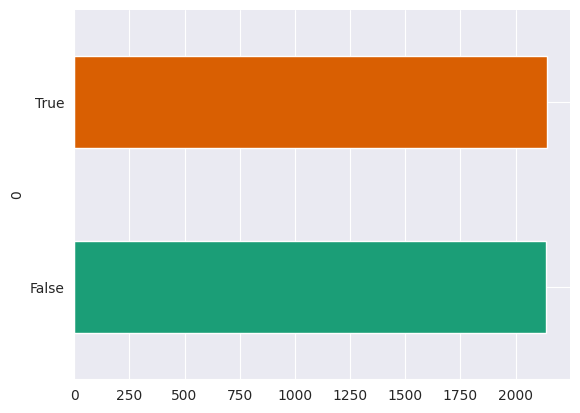

In [ ]:

pred_nn.groupby(0).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_sub = df_test.merge(pred_nn, left_index=True, right_index=True)
df_sub = df_sub.rename(columns={0:'Transported'})
df_submit = df_sub[['PassengerId','Transported']]
df_submit.set_index('PassengerId', inplace=True)
df_submit.to_csv('predictions_nn_2.csv')